# Data Collection and Processing

In [303]:
# Pre-load packages
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as gp
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate

from sklearn.preprocessing import StandardScaler


from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score

from dmba import liftChart, gainsChart

In [304]:
# Load the data

df = pd.read_csv('googleplaystore.csv')
df.head(n=5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [305]:
# List all columns

df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [306]:
# Rename columns to ensure better usage and readability

df.columns = ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Version',
       'Android_Version']

In [307]:
# Show renamed columns

df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Version',
       'Android_Version'],
      dtype='object')

In [308]:
# Find total number of rows and columns in the original DF

print('Number of Rows: ', len(df.index))
print('Number of Columns: ', len(df.columns))

Number of Rows:  10841
Number of Columns:  13


In [309]:
# Find nulls in all columns

df.isnull().sum()

App                   0
Category              0
Rating             1474
Reviews               0
Size                  0
Installs              0
Type                  1
Price                 0
Content_Rating        1
Genres                0
Last_Updated          0
Current_Version       8
Android_Version       3
dtype: int64

In [310]:
# Drop nulls 

df.dropna(axis=0, inplace=True)
df.isnull().sum()

App                0
Category           0
Rating             0
Reviews            0
Size               0
Installs           0
Type               0
Price              0
Content_Rating     0
Genres             0
Last_Updated       0
Current_Version    0
Android_Version    0
dtype: int64

In [311]:
# Find duplicates in App column - there are duplicates with different number of Reviews

df.groupby(['App'])['App'].count().reset_index(name='count').sort_values(by=['count'], ascending=False).head(n=5)

,App,count
6109,ROBLOX,9
1574,"CBS Sports App - Scores, News, Stats & Watch Live",8
1894,Candy Crush Saga,7
2860,Duolingo: Learn Languages Free,7
3008,ESPN,7


In [312]:
# Drop duplicate App records

df = df.sort_values('Reviews').drop_duplicates(subset=['App'], keep='last').reset_index(drop=True)
df.head(n=5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version
0,Food-Aw - Order Food Online in Aruba,FOOD_AND_DRINK,5.0,1,24M,100+,Free,0,Everyone,Food & Drink,"April 5, 2018",10,4.1 and up
1,House party - live chat,DATING,1.0,1,9.2M,10+,Free,0,Mature 17+,Dating,"July 31, 2018",3.52,4.0.3 and up
2,CB Fit,HEALTH_AND_FITNESS,5.0,1,7.8M,10+,Free,0,Everyone,Health & Fitness,"July 9, 2018",4.2.2,4.1 and up
3,UK Girls Mobile Numbers,DATING,3.0,1,5.5M,500+,Free,0,Mature 17+,Dating,"July 19, 2018",1.0,4.0.3 and up
4,FK CLASSIC FOR YOU,BUSINESS,5.0,1,3.5M,10+,Free,0,Everyone,Business,"February 20, 2018",1.1.0,4.0 and up


In [313]:
# Remove the '$' and ',' characters from the df['Price'] feature

df.Price.replace('\$|\,', '', regex=True, inplace=True)

In [314]:
df[df['Type'] == 'Paid'].Price

7       4.99
9       4.99
18      0.99
21      0.99
23      1.49
        ... 
8089    2.99
8097    2.99
8105    0.99
8106    2.99
8130    2.49
Name: Price, Length: 602, dtype: object

In [315]:
# Remove the '+' and ',' characters from the df['Installs'] feature

df.Installs.replace('\+|\,', '', regex=True, inplace=True)

In [316]:
df['Installs']

0           100
1            10
2            10
3           500
4            10
         ...   
8185     500000
8186    1000000
8187    1000000
8188     100000
8189    1000000
Name: Installs, Length: 8190, dtype: object

In [317]:
# Replace the string "Varies with device" in the df['Size'] feature with NaNs

df.Size.replace('Varies with device', np.nan, regex=True, inplace=True)

In [318]:
# Check if the string has been correctly replaced by NaNs

df[df['Size'].isna()].head(n=3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version
44,FAST EO,EVENTS,5.0,1,NaN,10,Free,0,Everyone,Events,"May 15, 2018",1.0.3,4.1 and up
83,ES Anywhere,BUSINESS,4.7,10,NaN,100,Free,0,Everyone,Business,"April 28, 2017",Varies with device,4.0.3 and up
123,The real aquarium - HD,PERSONALIZATION,4.3,100130,NaN,5000000,Free,0,Everyone,Personalization,"June 25, 2018",Varies with device,Varies with device


In [319]:
# Add a column 'Size_multiplier' to convert all Size values to the same unit (MB)

df["Size_multiplier"] = np.nan

for i in range(0,len(df)):
    if(df.Size.str.contains('k')[i] == True):
        df["Size_multiplier"][i] = 1/1000
    else:
        df["Size_multiplier"][i] = 1

In [320]:
# Remove the 'M' and 'k' characters from the df['Size'] feature

df.Size.replace('M', '', regex=True, inplace=True)
df.Size.replace('k', '', regex=True, inplace=True)

In [321]:
# Convert all Size values to the same unit (MB)

df = df.astype({"Size": float, "Size_multiplier": float})
df.Size = df.Size * df.Size_multiplier

df = df.drop(columns='Size_multiplier')

In [322]:
# Check data types of all columns

df.dtypes

App                 object
Category            object
Rating             float64
Reviews             object
Size               float64
Installs            object
Type                object
Price               object
Content_Rating      object
Genres              object
Last_Updated        object
Current_Version     object
Android_Version     object
dtype: object

In [323]:
# Convert relevant columns to numeric data types to make them usable

df = df.astype({"Price": float, "Installs": int, "Reviews": int})
df.dtypes

App                 object
Category            object
Rating             float64
Reviews              int64
Size               float64
Installs             int64
Type                object
Price              float64
Content_Rating      object
Genres              object
Last_Updated        object
Current_Version     object
Android_Version     object
dtype: object

In [324]:
# Final number of rows and columns of pre-processed data

print('Number of Rows: ', len(df.index))
print('Number of Columns: ', len(df.columns))

Number of Rows:  8190
Number of Columns:  13


In [325]:
# Final pre-processed data frame

np.array(df.head(n=5))

array([['Food-Aw - Order Food Online in Aruba', 'FOOD_AND_DRINK', 5.0, 1,
        24.0, 100, 'Free', 0.0, 'Everyone', 'Food & Drink',
        'April 5, 2018', '10', '4.1 and up'],
       ['House party - live chat', 'DATING', 1.0, 1, 9.2, 10, 'Free',
        0.0, 'Mature 17+', 'Dating', 'July 31, 2018', '3.52',
        '4.0.3 and up'],
       ['CB Fit', 'HEALTH_AND_FITNESS', 5.0, 1, 7.8, 10, 'Free', 0.0,
        'Everyone', 'Health & Fitness', 'July 9, 2018', '4.2.2',
        '4.1 and up'],
       ['UK Girls Mobile Numbers', 'DATING', 3.0, 1, 5.5, 500, 'Free',
        0.0, 'Mature 17+', 'Dating', 'July 19, 2018', '1.0',
        '4.0.3 and up'],
       ['FK CLASSIC FOR YOU', 'BUSINESS', 5.0, 1, 3.5, 10, 'Free', 0.0,
        'Everyone', 'Business', 'February 20, 2018', '1.1.0',
        '4.0 and up']], dtype=object)

# Data Exploration & Visualization

### 1) Top 5 App Categories based on Number of Installations 

In [326]:
# Group by category and order by sum of installs

df_install_byCat = df.groupby(by='Category').sum().sort_values(by = 'Installs', ascending = False).head(n=5)[['Installs']]
df_install_byCat

,Installs
Category,
GAME,13387762717
COMMUNICATION,11038241530
TOOLS,8000224500
FAMILY,6231030590
PRODUCTIVITY,5793070180


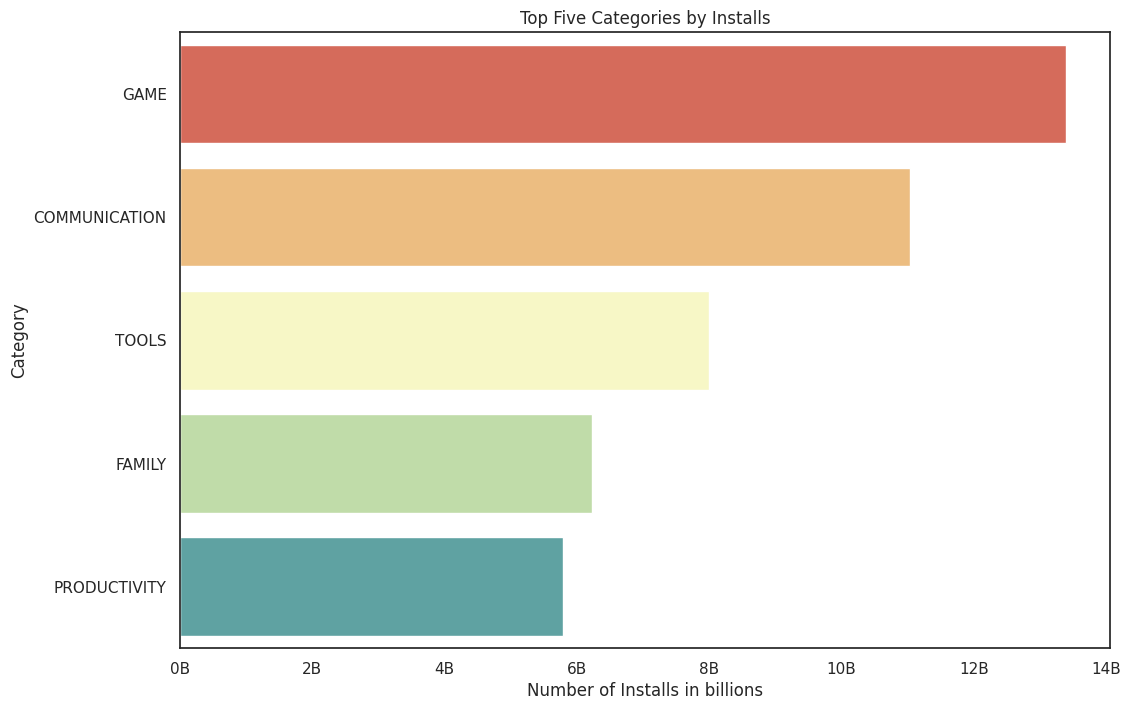

In [327]:
plt.figure(figsize=(12,8))

sns.set_theme(style="white")
b = sns.barplot(data=df_install_byCat, x='Installs', y=df_install_byCat.index, orient='h', palette='Spectral')

plt.title('Top Five Categories by Installs')
xlabels = ['{:,.0f}'.format(x) + 'B' for x in b.get_xticks()/1000000000]
b.set_xticklabels(xlabels)
plt.xlabel('Number of Installs in billions')
plt.ylabel('Category')

plt.show()

#### Observations:

* From the chart we can see that **most apps downloaded** on Playstore are either **Games or Communication** based. 
* This is a great representation because entertainment is top priority and communication services like Whatsapp and Messenger are essential in today's world.

### 2) Top 5 Highest Rated Apps based on Number of Reviews

In [328]:
# Sort apps by number of reviews and rating

df.sort_values(by=['Reviews', 'Rating'], ascending=False).head(n=5)\
    .drop(columns=['Size', 'Price', 'Last_Updated', 'Current_Version', 'Android_Version', 'Genres'])\
    .reset_index(drop=True)

,App,Category,Rating,Reviews,Installs,Type,Content_Rating
0,Facebook,SOCIAL,4.1,78158306,1000000000,Free,Teen
1,WhatsApp Messenger,COMMUNICATION,4.4,69119316,1000000000,Free,Everyone
2,Instagram,SOCIAL,4.5,66577446,1000000000,Free,Teen
3,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,1000000000,Free,Everyone
4,Clash of Clans,GAME,4.6,44893888,100000000,Free,Everyone 10+


#### Observations:

* The top 4 apps with **most number of reviews and highest rating** all belong to Meta - they are all **social media apps or communication services**.
* **Clash of Clans** looks to be one of the **most popular games** on Playstore.

### 3) App Categories ordered by Number of Reviews

In [329]:
# Group by category and order by reviews per install

df_reviews_byCat = df.groupby(by='Category').sum()[['Installs', 'Reviews']]

df_reviews_byCat['Reviews_per_install'] = df_reviews_byCat.Reviews/df_reviews_byCat.Installs
df_reviews_byCat = df_reviews_byCat.sort_values(by='Reviews_per_install', ascending=False)

df_reviews_byCat.head(n=5)

,Installs,Reviews,Reviews_per_install
Category,,,
COMICS,44931100,2341068,0.052104
GAME,13387762717,588990182,0.043995
SOCIAL,5487841475,227936024,0.041535
MAPS_AND_NAVIGATION,503267560,17728954,0.035228
PERSONALIZATION,1532341930,53542373,0.034942


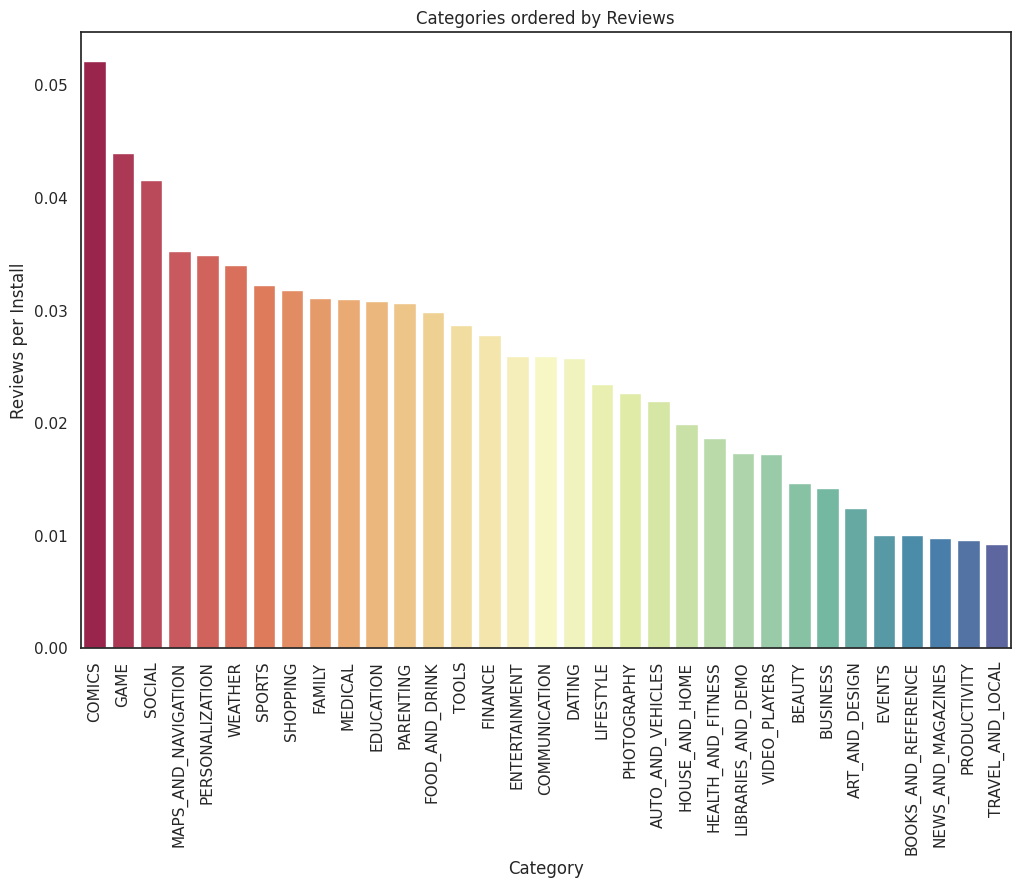

In [330]:
plt.figure(figsize=(12,8))

sns.set_theme(style="white")
sns.barplot(data=df_reviews_byCat, x=df_reviews_byCat.index, y='Reviews_per_install', orient='v', palette='Spectral')

plt.title('Categories ordered by Reviews')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.ylabel('Reviews per Install')

plt.show()

#### Observations:

* We calculated a new field **'Reviews per install'** to use for this chart so as to not skew the results (some records have high number of installs and hence more reviews).
* **Comics** is the **most reviewed category** followed by **games and social media**.
* The **least reviewed categories** are **books, news, productivity and travel**.

### 4a) Frequency Distribution of Ratings on Playstore

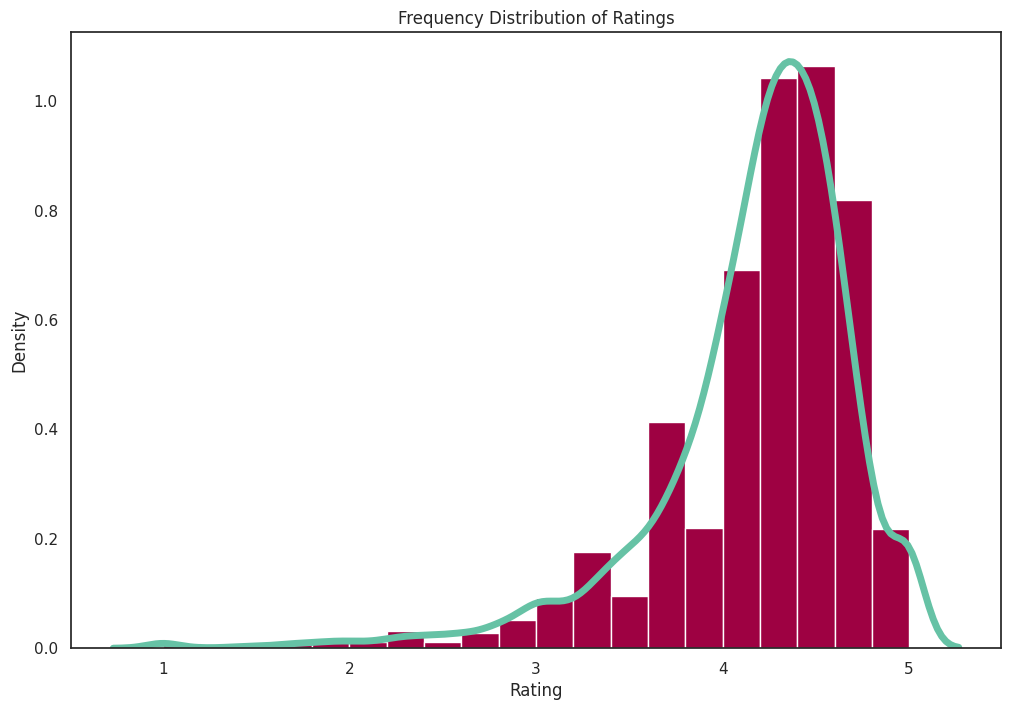

In [331]:
plt.figure(figsize=(12,8))

sns.set_theme(style="white")

plt.hist(df['Rating'], bins=20, color='#9e0142', density=True)
sns.kdeplot(data=df['Rating'], color='#66c2a5', linewidth=5)
plt.title('Frequency Distribution of Ratings')
plt.xlabel('Rating')

plt.show()

#### Observations:

* The **most common rating** on playstore is between **4.5 and 4.6** as per this dataset.
* The distribution tells us that most ratings **range between 4 and 5**.
* **Ratings below 3 are low** in number which implies that people are generally content with apps.
* **Ratings around 1.5** are practically non-existent.

### 4b) Frequency Distribution of App Prices

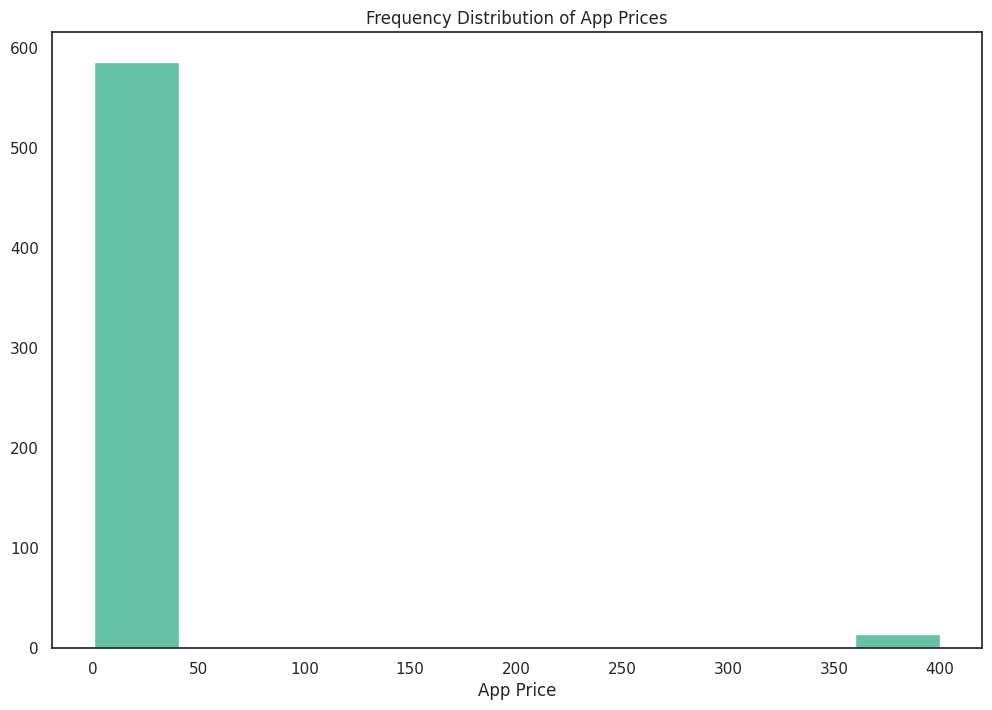

In [332]:
plt.figure(figsize=(12,8))

sns.set_theme(style="white")

plt.hist(df[df['Price'] > 0]['Price'], color='#66c2a5')
plt.title('Frequency Distribution of App Prices')
plt.xlabel('App Price')

plt.show()

#### Observations:

* Of the paid apps, most apps have their prices in the range **1-45 USD**.
* About **14 apps** have a price of **>350 USD and <400 USD**.

### 4c) Frequency Distribution of App Sizes

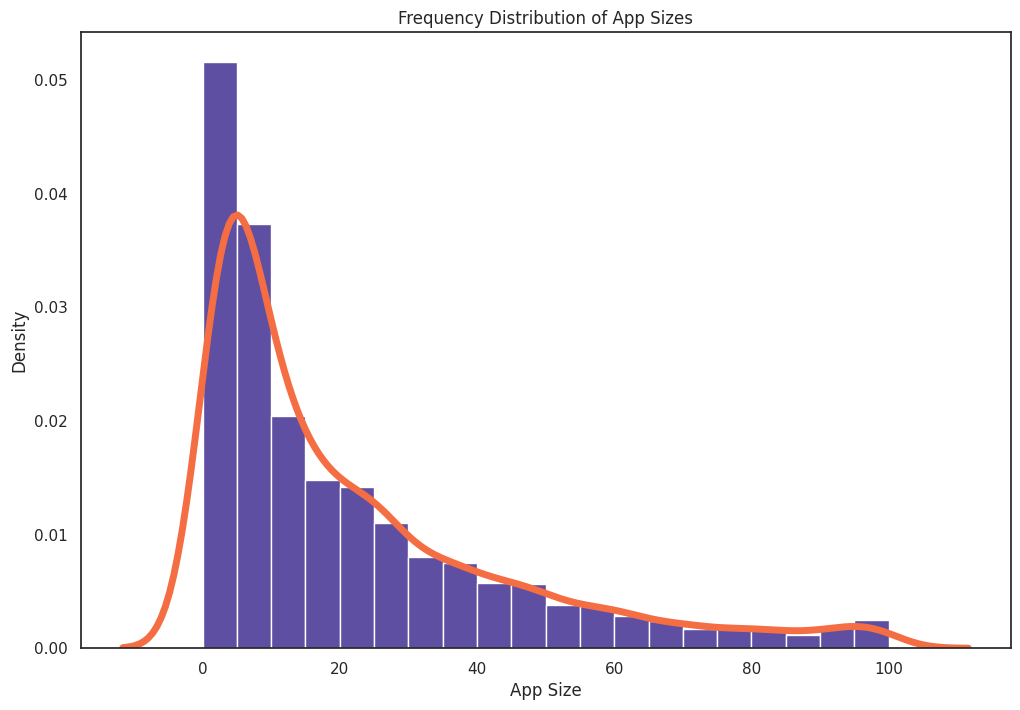

In [333]:
plt.figure(figsize=(12,8))

sns.set_theme(style="white")

plt.hist(df['Size'], bins=20, color='#5e4fa2', density=True)
sns.kdeplot(data=df['Size'], color='#f46d43', linewidth=5)
plt.title('Frequency Distribution of App Sizes')
plt.xlabel('App Size')

plt.show()

#### Observations:

* Of the 8000+ apps in the dataset, **~4263 apps** have a size of **<20 MB**.
* About **14 apps** have a size of **100 MB** which is the maximum in this dataset.

### 5) Ratings vs. Number of Reviews

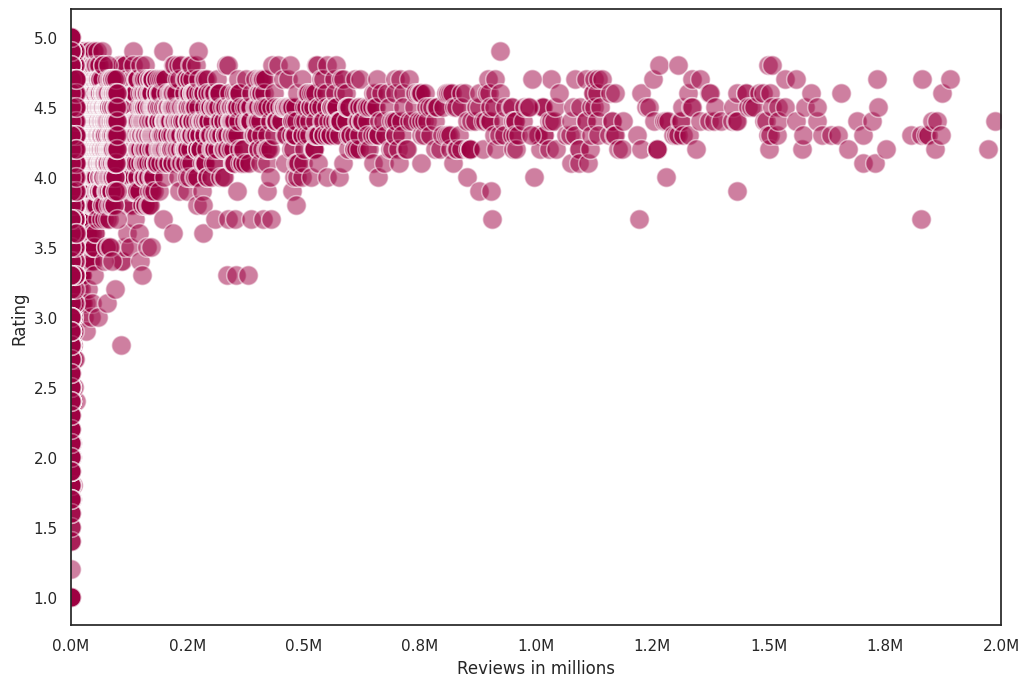

In [334]:
plt.figure(figsize=(12,8))

g = sns.scatterplot(data=df, x='Reviews', y='Rating', s=200, alpha=0.5, color='#9e0142')

plt.xlim(0,2000000)
xlabels = ['{:,.1f}'.format(x) + 'M' for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels)
plt.xlabel('Reviews in millions')

plt.show()

#### Observations:

* Most app ratings are in the range **3.5 and 5** as can be seen from the above graph.
* The apps which have **most number of reviews** are the apps rated in the approximate range of **4.25-4.75**. 
* For most apps, the number of reviews are **less than 0.5 million**.
* There are a few apps which have more than 4 million reviews and even close to 80 million reviews which we have treated as outliers in this chart.
* Not many apps have low ratings and less reviews.

### 6) Median Ratings of all App Categories with Lower and Upper Quartiles

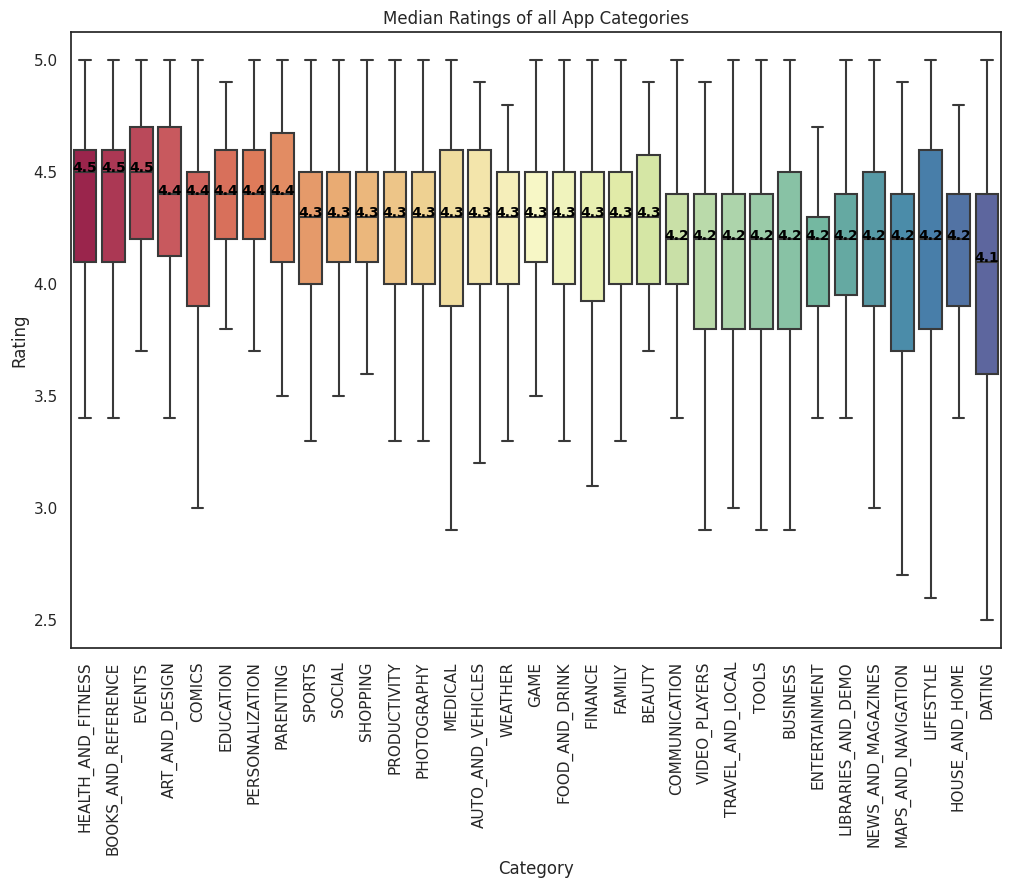

In [335]:
plt.figure(figsize=(12,8))

medians = df.groupby(by=['Category'])['Rating'].median().sort_values(ascending=False)
my_order = medians[::1].index

sns.set_theme(style="white")
box_plot = sns.boxplot(data=df, y="Rating", x="Category", palette='Spectral', order=my_order, showfliers=False)

plt.title('Median Ratings of all App Categories')
plt.xticks(rotation=90)
for xtick in box_plot.get_xticks():
    box_plot.text(xtick, medians[xtick], medians[xtick],
                  horizontalalignment='center',
                  size='small',color='black',weight='semibold')

plt.show()

#### Observations:

* The categories with the **highest median rating of 4.5** are **Health & Fitness, Books and Events**.
* The **lowest median rating** of a category in the dataset is **4.1 for Dating**.
* Barring outliers which have been removed from this plot, the **lowest rated app** also belongs to the **Dating** category.
* Some categories like **Education, Weather, Beauty and Maps** do not have a **single app rated 5 stars**.
* The **Entertainment** category has the **lowest upper quartile and the lowest maximum rating**.

### 7) Top 5 Most Reviewed App Categories based on Content Rating

In [336]:
# Group by category and content rating and find reviews per install

df_reviews_bycatcontent= df.groupby(by=['Category', 'Content_Rating'], as_index=False)\
                           .sum()[['Category', 'Content_Rating', 'Installs', 'Reviews']]
df_reviews_bycatcontent['Reviews_per_install'] = df_reviews_bycatcontent.Reviews/df_reviews_bycatcontent.Installs

top5categories = df_reviews_bycatcontent.sort_values(by='Reviews_per_install', ascending=False).Category.head(n=5).to_list()

dftop5 = df_reviews_bycatcontent\
        .sort_values(by='Reviews_per_install', ascending=False)[df_reviews_bycatcontent['Category']\
        .isin(top5categories)]

dftop5.head(n=5)

,Category,Content_Rating,Installs,Reviews,Reviews_per_install
29,EDUCATION,Teen,1000000,256079,0.256079
83,PRODUCTIVITY,Mature 17+,1000,84,0.084000
102,TRAVEL_AND_LOCAL,Mature 17+,10000000,751551,0.075155
75,PERSONALIZATION,Everyone 10+,12510000,920999,0.073621
46,GAME,Everyone 10+,2404860000,145010478,0.060299


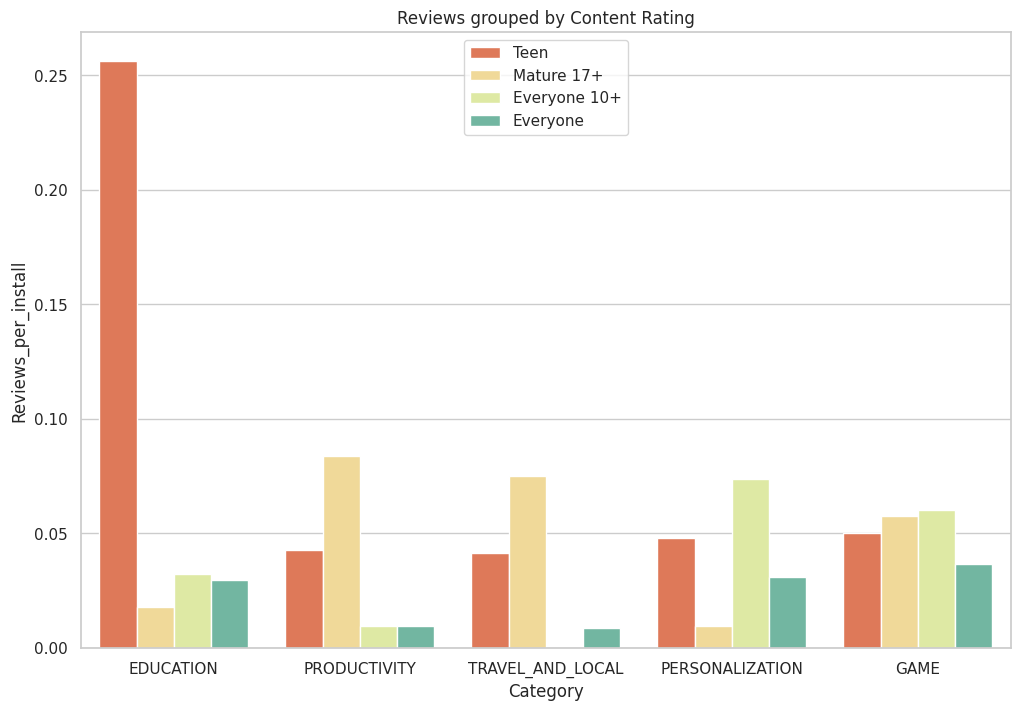

In [337]:
plt.figure(figsize=(12,8))

sns.set_theme(style="whitegrid")
sns.barplot(
    data=dftop5,
    y="Reviews_per_install", x="Category",
    ci=None, 
    hue="Content_Rating",
    palette="Spectral",
    order=top5categories)

plt.title('Reviews grouped by Content Rating')
plt.legend(loc='upper center')

plt.show()

#### Observations:

* Taking reviews per install into consideration for this chart as well, **Education** seems to be **most reviewed by Teens** which seems accurate.
* **Games** category is almost equally reviewed by **all age groups**.
* **Productivity and Travel** are reviewed mostly by the **Mature 17+ category** followed by **Teens**.

### 8) Population pyramid of App Categories by Type

In [338]:
# Group by Category and Type and find the count of apps in each Category and Type

df_catbytype = df.groupby(by=['Category', 'Type'], as_index=False)\
                .count()[['Category', 'Type', 'App']]\
                .sort_values(by='App', ascending=False)

# Divide the data into two data frames for Free and Paid App data

df_catbytype_free = df_catbytype[df_catbytype['Type']=='Free']
df_catbytype_paid = df_catbytype[df_catbytype['Type']=='Paid']
df_catbytype_paid['App'] = df_catbytype_paid['App']*-1  # To plot the data on the negative axis

df_catbytype.head(n=5)

,Category,Type,App
19,FAMILY,Free,1497
25,GAME,Free,820
53,TOOLS,Free,655
21,FINANCE,Free,289
31,LIFESTYLE,Free,283


In [339]:
fig = gp.Figure()
  
# Adding Free app data to the figure
fig.add_trace(gp.Bar(y=df_catbytype_free.Category, x=df_catbytype_free.App, 
                     name='Free', 
                     orientation='h',
                     marker={'color': '#5e4fa2'}))

# Adding Paid app data to the figure
fig.add_trace(gp.Bar(y=df_catbytype_paid.Category, x=df_catbytype_paid.App, 
                     name='Paid', 
                     orientation='h',
                     marker={'color': '#f46d43'}))

# Updating the layout
fig.update_layout(title={'text': "Population Pyramid of App Categories by Type",
                        'y':0.88,
                        'x':0.55,
                        'xanchor': 'center',
                        'yanchor': 'top'},
                  title_font_size=12, barmode='relative',
                  bargap=0, bargroupgap = 0, height=650, width=800,
                  yaxis=dict(autorange='reversed'))

fig.show()

#### Observations:

* The population pyramid of app count clearly tells us that the **majority of apps** on the Playstore are **free**.
* Looking at the ratio of Free to Paid apps in all categories on Playstore, most number of apps as well as the **most number of paid apps** belong to the **Family** category.
* There are aboout **76 paid apps** in the **Game** category.
* **Tools, Personalization and Medical** also have about 60 paid apps.
* **Comics, Libraries, Home, Vehicles, Events and Beauty** categories only have **free apps**.

### 9) App Sizes vs. Installs

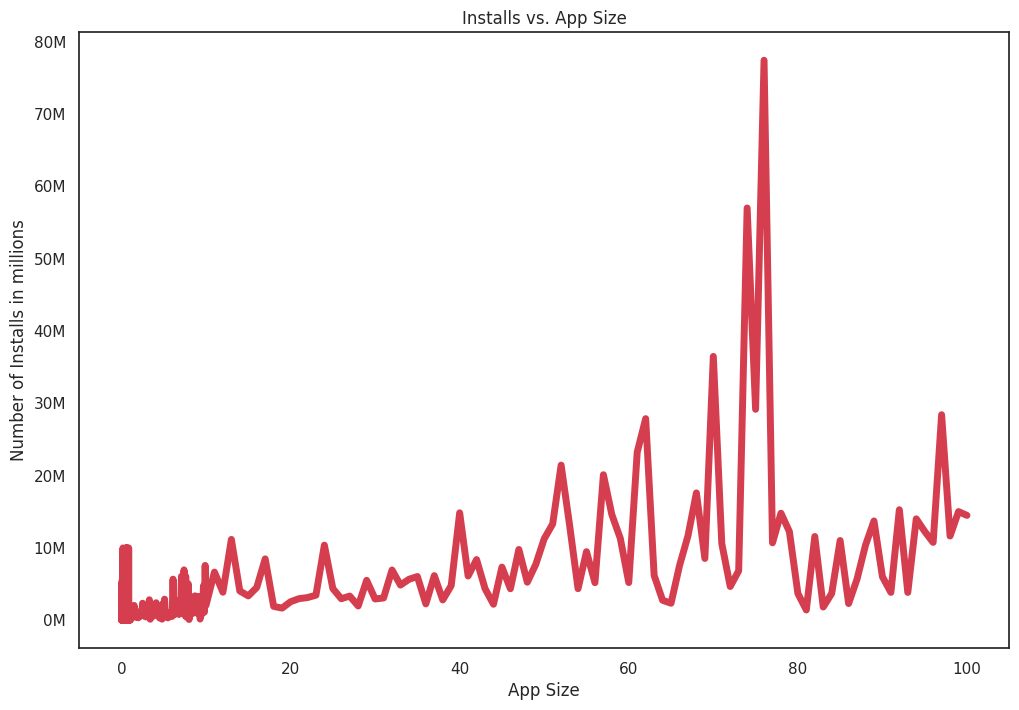

In [340]:
plt.figure(figsize=(12,8))

sns.set_theme(style="white")
l = sns.lineplot(data=df, y='Installs', x='Size', ci=None, color='#d53e4f', linewidth=5)

ylabels = ['{:,.0f}'.format(y) + 'M' for y in l.get_yticks()/1000000]
l.set_yticklabels(ylabels)
plt.ylabel('Number of Installs in millions')
plt.xlabel('App Size')
plt.title('Installs vs. App Size')

plt.show()

#### Observations:

* Apps of around **70-80 MB** size have the **highest** number of installs **(~80M)**.
* Apps of **close to 100 MB** size have around **30M installs**.
* Apps of size **<10MB** are mostly downloaded lesser **(~<10M installs)**.

### 10) Correlation Matrix

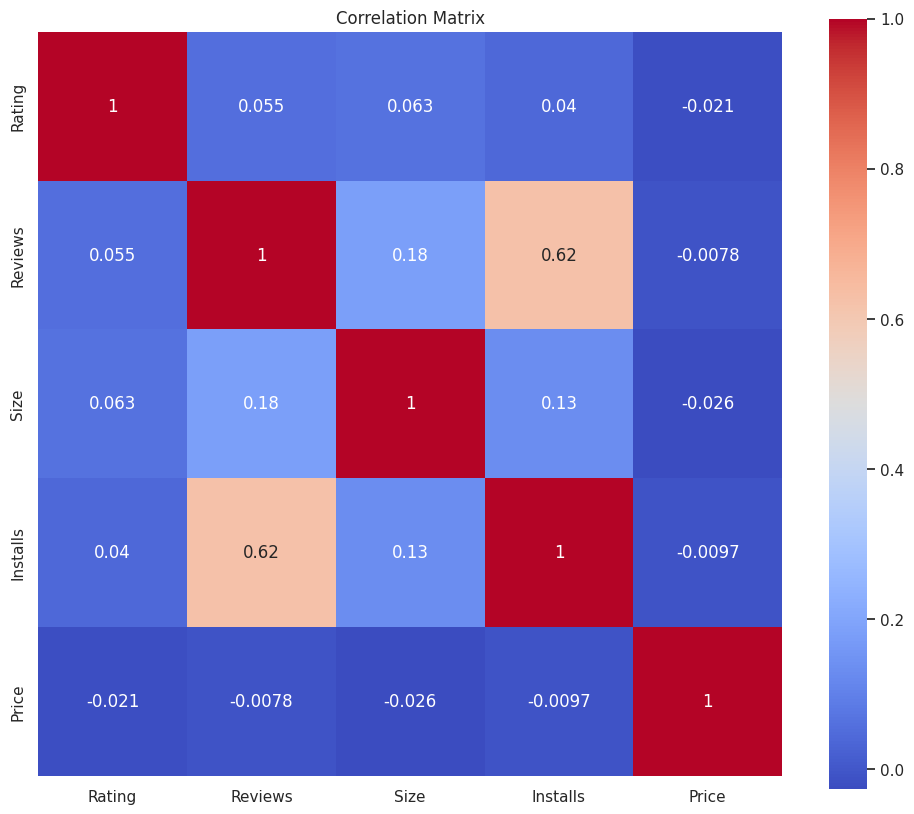

In [341]:
corr_matrix = df.corr()

# Create a heatmap plot
plt.figure(figsize = [12,10])
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix')
plt.show()

#### Observations:

* Looks like all numerical columns do not have a very high correlation, meaning we can use all these as features for our ML models
* Reviews vs Size has a relatively high correlation, but that makes sense because higher reviews result in higher number of installs. Hence, both these features are important.

# Running ML Models

In [342]:
df.head(n = 5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version
0,Food-Aw - Order Food Online in Aruba,FOOD_AND_DRINK,5.0,1,24.0,100,Free,0.0,Everyone,Food & Drink,"April 5, 2018",10,4.1 and up
1,House party - live chat,DATING,1.0,1,9.2,10,Free,0.0,Mature 17+,Dating,"July 31, 2018",3.52,4.0.3 and up
2,CB Fit,HEALTH_AND_FITNESS,5.0,1,7.8,10,Free,0.0,Everyone,Health & Fitness,"July 9, 2018",4.2.2,4.1 and up
3,UK Girls Mobile Numbers,DATING,3.0,1,5.5,500,Free,0.0,Mature 17+,Dating,"July 19, 2018",1.0,4.0.3 and up
4,FK CLASSIC FOR YOU,BUSINESS,5.0,1,3.5,10,Free,0.0,Everyone,Business,"February 20, 2018",1.1.0,4.0 and up


In [343]:
# Selecting columns based on how likely the predictors may affect the output variable
# Category : There are many unique categories (about 10). Making dummies and training the model with categories resulted 
# in a very low difference of metrics. The training time was more, and cost was more. Hence, we did not use it as predictor

predictors = ['Reviews', 'Size', 'Installs', 'Price', 'Content_Rating', 'Rating']

In [344]:
X = df[predictors]

In [345]:
#X_type_dummies = pd.get_dummies(X['Type'])
X_Content_Rating_dummies = pd.get_dummies(X['Content_Rating'])
#X_Category_dummies = pd.get_dummies(X['Category'])

#X = pd.concat([X, X_type_dummies, X_Content_Rating_dummies], axis = 1)
X = pd.concat([X, X_Content_Rating_dummies], axis = 1)

#X = X.drop(['Type', 'Content_Rating'], axis = 1)
X = X.drop(['Content_Rating'], axis = 1)

In [346]:
X = X.dropna(axis = 0)

In [347]:
def Scoring_fun(y_true, y_predict):
    mse = metrics.mean_squared_error(y_true,y_predict)
    mae = metrics.mean_absolute_error(y_true,y_predict)
    return mse, mae

In [348]:
y = X.Rating
X = X.drop(['Rating'], axis = 1)

In [349]:
# Splitting data into train and test set

random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = False)

In [350]:
# Function for Lift Chart

def lift_calc(y_pred, name):
  pred_v = pd.Series(y_pred)
  pred_v = pred_v.sort_values(ascending=False)

  fig, axes = plt.subplots(nrows=1, ncols=2)
  ax = gainsChart(pred_v, ax=axes[0])
  ax.set_ylabel("Cumulative Price")

  ax.set_title("Cumulative Gains Chart")

  ax = liftChart(pred_v, ax=axes[1], labelBars=False)
  ax.set_ylabel('Lift Chart')

  plt.title(name)
  plt.tight_layout()
  plt.show()
  print("Above plots for " + name)
  print(" ")

### 1. Linear Regression

In [351]:
# Running Linear Regression model

model_lr = LinearRegression()

model_lr.fit(X_train, y_train)

results_lr = model_lr.predict(X_test)

In [352]:
# Calculating metrics to determine which model to use

score = metrics.r2_score(y_test, results_lr)
mse, mae = Scoring_fun(y_test, results_lr)

rmse_scores = []
model_type = []

rmse_scores = np.append(rmse_scores, mse**0.5)
model_type = np.append(model_type, 'Linear Regression')

print('Mean Squared Error = ', mse,
      '\nRoot Mean Squared Error = ', mse**0.5,
      '\nMean Absolute Error = ', mae,
      '\nScore = ', score)

Mean Squared Error =  0.2788859784951389 
Root Mean Squared Error =  0.5280965617149376 
Mean Absolute Error =  0.38001688150727414 
Score =  0.010596142503767392


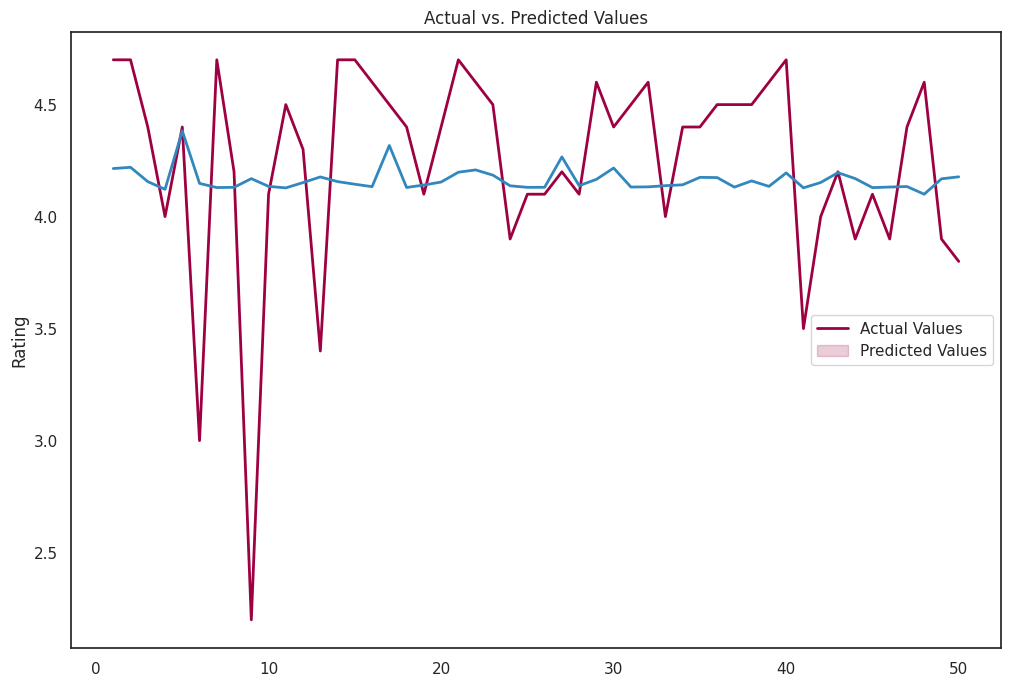

In [353]:
# Plotting to compare a sample of actual values (y_test) and values predicted by linear regressor model

fig, ax = plt.subplots(figsize=(12, 8))

sns.set_theme(style="white")
sns.lineplot(y=y_test.iloc[:50],x=range(1,51), ax=ax, linewidth=2, color='#9e0142')
sns.lineplot(y=results_lr[:50],x=range(1,51), ax=ax, linewidth=2, color='#3288bd')

plt.title('Actual vs. Predicted Values')
plt.legend(labels=['Actual Values', 'Predicted Values'], loc='center right')

plt.show()

### 2. KNN Regressor

In [354]:
# First running baseline KNN for n = 1 and without using scaled data:
neigh = KNeighborsRegressor(
    n_neighbors=1,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None)

neigh.fit(X_train, y_train)

results_knn = neigh.predict(X_test)

mse, mae = Scoring_fun(y_test, results_knn)

print('Mean Squared Error = ', mse, ', Mean Absolute Error = ', mae)

Mean Squared Error =  0.4879430604982206 , Mean Absolute Error =  0.4973665480427047


In [355]:
# Scaling & Splitting the data for KNN

X_scale = X
scaler = StandardScaler()
X_scale = scaler.fit_transform(X_scale)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scale, y, test_size = 0.2, shuffle = False)

In [356]:
X.columns

Index(['Reviews', 'Size', 'Installs', 'Price', 'Adults only 18+', 'Everyone',
       'Everyone 10+', 'Mature 17+', 'Teen', 'Unrated'],
      dtype='object')

In [357]:
# Finding correct value for K to tackle the Bias-Variance trade-off for Minkowski and Manhattan
# and finding best n value for KNN using manually constructed GridSearchCV

store_results = pd.DataFrame()
neigh = []
mse_score_results = []
mae_score_results = []
metric = []

for neighbors in range(1,20):
    
    for metr in ['minkowski', 'manhattan']:
    
        neigh_ = KNeighborsRegressor(
        n_neighbors=neighbors,
        weights='uniform',
        algorithm='auto',
        leaf_size=30,
        p=2,
        metric=metr,
        metric_params=None,
        n_jobs=None)

        neigh_.fit(X_train_scaled, y_train_scaled)
        results_knn_ = neigh_.predict(X_test_scaled)
        
        mse_, mae_ = Scoring_fun(y_test_scaled, results_knn_)
        
        neigh = np.append(neigh, neighbors)
        mse_score_results = np.append(mse_score_results,mse_)
        mae_score_results = np.append(mae_score_results,mae_)
        metric = np.append(metric, metr)

In [358]:
matrix_aux = np.transpose((np.vstack([neigh, mse_score_results, mae_score_results, metric])))
store_results = pd.DataFrame(matrix_aux, columns = ['No. of Neighbors', 'MSE', 'MAE', 'Metric'])

In [359]:
store_results.sort_values(by = ['MSE', 'MAE'], ascending = [True, True]).head(n = 5)

,No. of Neighbors,MSE,MAE,Metric
16,9.0,0.28295145204516503,0.3858046658758402,minkowski
37,19.0,0.2833467927169488,0.38588125117063127,manhattan
23,12.0,0.2835079082641361,0.3863701067615659,manhattan
36,19.0,0.2836316479529973,0.38606106012361874,minkowski
21,11.0,0.2838088291520838,0.38689097379488835,manhattan


In [360]:
store_results = store_results.astype({"MSE": float, "MAE": float, "No. of Neighbors": float})

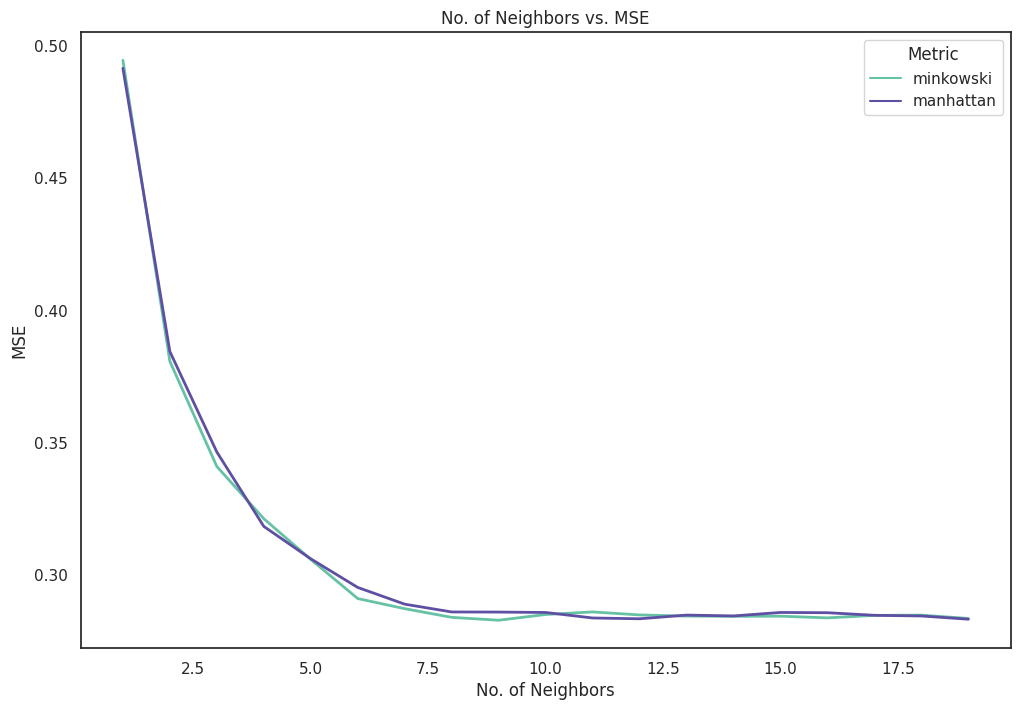

In [361]:
plt.figure(figsize=(12,8))

sns.set_theme(style="white")
sns.lineplot(data=store_results,
             x='No. of Neighbors', 
             y='MSE',
             hue='Metric',
             palette=('#66c2a5', '#5e4fa2'),
             linewidth=2)

plt.title('No. of Neighbors vs. MSE')

plt.show()

In [362]:
# Using GridSearchCV

knn = KNeighborsRegressor()
k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv = 5, scoring='neg_mean_squared_error')
grid.fit(X_train_scaled, y_train_scaled)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             scoring='neg_mean_squared_error')

In [363]:
# Finding best k value <same as manual grid search)
grid.best_params_

{'n_neighbors': 19}

In [364]:
knn_best = KNeighborsRegressor(n_neighbors=19)
scores = cross_val_score(knn_best, X_train_scaled, y_train_scaled, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation scores: ", -scores)
print("Average cross-validation score: ", -scores.mean())

Cross-validation scores:  [0.39658846 0.34254455 0.24096539 0.34365052 0.31208745]
Average cross-validation score:  0.3271672738316373


In [365]:
# Calculating metrics to determine which model to use

knn_best.fit(X_train_scaled, y_train_scaled)

results_knn = knn_best.predict(X_test_scaled)

mse, mae = Scoring_fun(y_test_scaled, results_knn)

score = metrics.r2_score(y_test_scaled, results_knn)

mse, mae = Scoring_fun(y_test_scaled, results_knn)

rmse_scores = np.append(rmse_scores, mse**0.5)
model_type = np.append(model_type, 'KNN Regression')

print('Mean Squared Error = ', mse,
      '\nRoot Mean Squared Error = ', mse**0.5,
      '\nMean Absoulte Error = ', mae,
      '\nScore = ', score)

Mean Squared Error =  0.2836316479529973 
Root Mean Squared Error =  0.532570791494424 
Mean Absoulte Error =  0.38606106012361874 
Score =  -0.006240070250073115


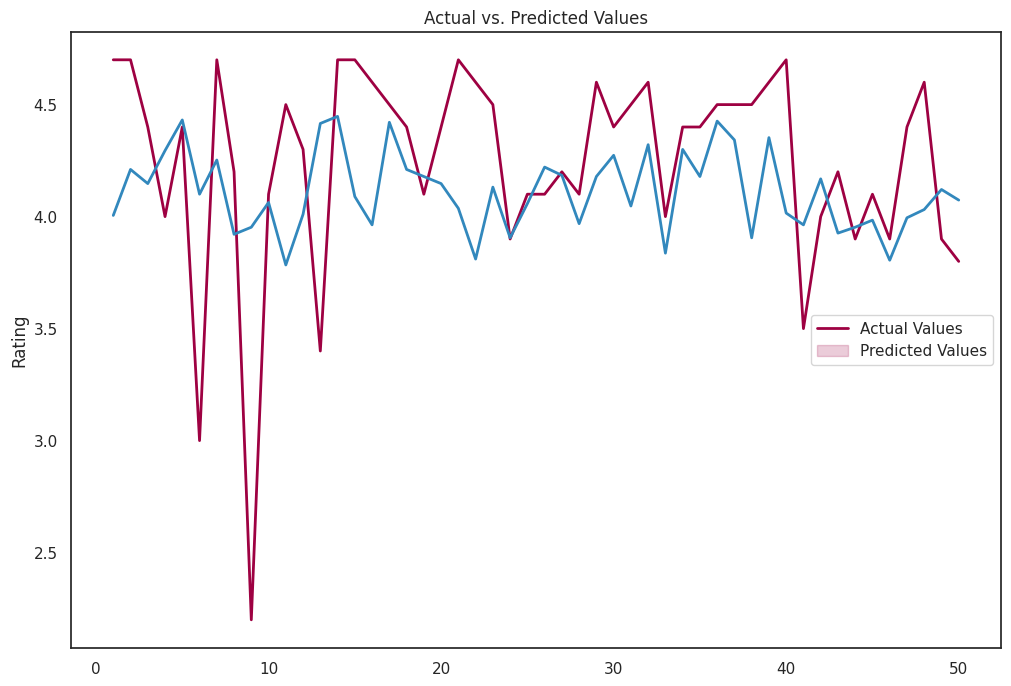

In [366]:
# Plotting to compare a sample of actual values (y_test) and values predicted by KNN regressor model

fig, ax = plt.subplots(figsize=(12, 8))

sns.set_theme(style="white")
sns.lineplot(y=y_test_scaled.iloc[:50],x=range(1,51), ax=ax, linewidth=2, color='#9e0142')
sns.lineplot(y=results_knn[:50],x=range(1,51), ax=ax, linewidth=2, color='#3288bd')

plt.title('Actual vs. Predicted Values')
plt.legend(labels=['Actual Values', 'Predicted Values'], loc='center right')

plt.show()

### 3. Support Vector Regressor

In [367]:
# Scaling the data
X_scale = X
scaler = StandardScaler()
X_scale = scaler.fit_transform(X_scale)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scale, y, test_size = 0.2, shuffle = False)


# Create SVM regressor object
#svm = SVR()

# Define range of hyperparameters to search
#param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Use grid search to find optimal hyperparameters
#grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='neg_mean_squared_error')
#grid_search.fit(X_train_scaled, y_train_scaled)

# Print the optimal hyperparameters
#print("Best parameters: ", grid_search.best_params_)

# Use cross-validation to evaluate performance with optimal hyperparameters
#svm_best = SVR(**grid_search.best_params_)

#scores = cross_val_score(svm_best, X_train_scaled, y_train_scaled, cv=5, scoring='neg_mean_squared_error')

# Print the cross-validation scores
#print("Cross-validation scores: ", -scores)
#print("Average cross-validation score: ", -scores.mean())


In [368]:
svm_best = SVR(C =  10, gamma = 1, kernel = 'rbf')

svm_best.fit(X_train_scaled, y_train_scaled)

results_svm = svm_best.predict(X_test_scaled)

mse, mae = Scoring_fun(y_test_scaled, results_svm)

score = metrics.r2_score(y_test_scaled, results_svm)

mse, mae = Scoring_fun(y_test_scaled, results_svm)

rmse_scores = np.append(rmse_scores, mse**0.5)
model_type = np.append(model_type, 'SVM Regression')

print('Mean Squared Error = ', mse,
      '\nRoot Mean Squared Error = ', mse**0.5,
      '\nMean Absoulte Error = ', mae,
      '\nScore = ', score)

Mean Squared Error =  0.2819891031974892 
Root Mean Squared Error =  0.5310264618618259 
Mean Absoulte Error =  0.3660913938503214 
Score =  -0.00041281379932156526


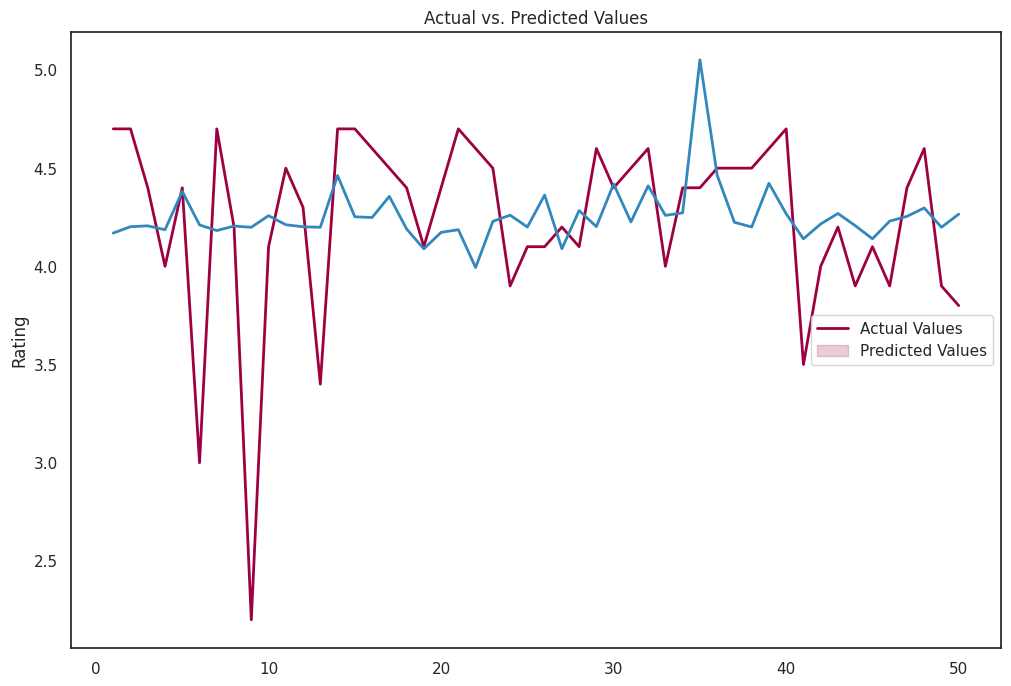

In [369]:
# Plotting to compare a sample of actual values (y_test) and values predicted by support vector regressor model

fig, ax = plt.subplots(figsize=(12, 8))

sns.set_theme(style="white")
sns.lineplot(y=y_test_scaled.iloc[:50],x=range(1,51), ax=ax, linewidth=2, color='#9e0142')
sns.lineplot(y=results_svm[:50],x=range(1,51), ax=ax, linewidth=2, color='#3288bd')

plt.title('Actual vs. Predicted Values')
plt.legend(labels=['Actual Values', 'Predicted Values'], loc='center right')

plt.show()

### 4. Random Forest Regressor

In [370]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# Running Random Forest Regressor model

rf_model = RandomForestRegressor(n_estimators=44, max_features='auto', max_depth=9, random_state=300)
rf_model.fit(X_train, y_train)
rf_final_result = rf_model.predict(X_test)

In [371]:
score = metrics.r2_score(y_test, rf_final_result)
mse, mae = Scoring_fun(y_test, rf_final_result)

rmse_scores = np.append(rmse_scores, mse**0.5)
model_type = np.append(model_type, 'RF Regression')

print('Mean Squared Error = ', mse,
      '\nRoot Mean Squared Error = ', mse**0.5,
      '\nMean Absolute Error = ', mae,
      '\nScore = ', score)

Mean Squared Error =  0.24075481128117152 
Root Mean Squared Error =  0.4906677198279621 
Mean Absolute Error =  0.3451550461285604 
Score =  0.14587409421689312


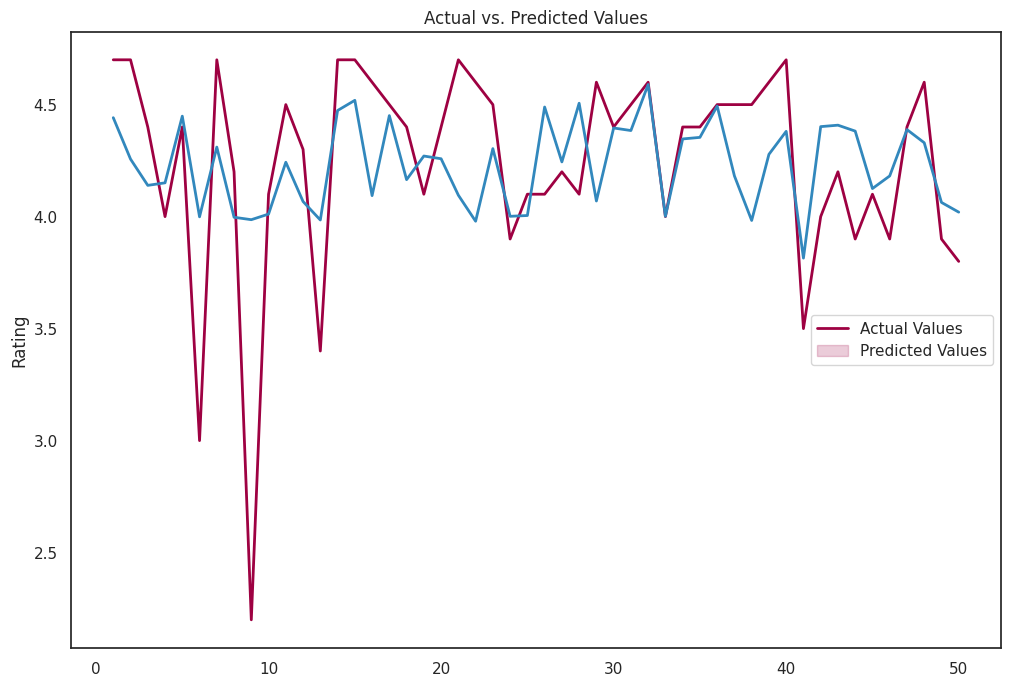

In [372]:
# Plotting to compare a sample of actual values (y_test) and values predicted by random forest regressor model

fig, ax = plt.subplots(figsize=(12, 8))

sns.set_theme(style="white")
sns.lineplot(y=y_test.iloc[:50],x=range(1,51), ax=ax, linewidth=2, color='#9e0142')
sns.lineplot(y=rf_final_result[:50],x=range(1,51), ax=ax, linewidth=2, color='#3288bd')

plt.title('Actual vs. Predicted Values')
plt.legend(labels=['Actual Values', 'Predicted Values'], loc='center right')

plt.show()

In [373]:
# Define the hyperparameters to search over
#param_grid = {
 #   "n_estimators": [40, 44, 50],
  #  "max_depth": [3, 6, 9],
   # "max_features": ['auto'],
    #"random_state": [100, 200, 300]
#}

# Instantiate the Random Forest Regressor model
#rf = RandomForestRegressor()

# Perform a grid search over the hyperparameters
#grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)
#grid_search.fit(X_train, y_train)

# Get the best hyperparameters
#best_params = grid_search.best_params_
#print("Best hyperparameters:", best_params)


In [374]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest Regressor as a base model
rf = RandomForestRegressor(n_estimators=44, max_features='auto', max_depth=9, random_state=300)
rf.fit(X_train, y_train)

# Use the Random Forest Regressor predictions as inputs for Gradient Boosting Regressor
gb = GradientBoostingRegressor(n_estimators=44, max_features='auto', learning_rate = 0.00001, max_depth=9, random_state=300)
gb.fit(X_train, y_train - rf.predict(X_train))

# Evaluate the model on the test set
y_pred = gb.predict(X_test) + rf.predict(X_test)
results_rf = y_pred

score = metrics.r2_score(y_test, y_pred)
mse, mae = Scoring_fun(y_test, y_pred)

print('Mean Squared Error = ', mse,
      '\nRoot Mean Squared Error = ', mse**0.5,
      '\nMean Absolute Error = ', mae,
      '\nScore = ', score)

Mean Squared Error =  0.24064065012821814 
Root Mean Squared Error =  0.49055137358712814 
Mean Absolute Error =  0.34528769035773205 
Score =  0.14627910376853048


### 5. Neural Networks


In [375]:
model = MLPRegressor(activation='tanh', hidden_layer_sizes=(50, 100, 50), max_iter=5000,
               n_iter_no_change=10)

model.fit(X_train_scaled, y_train_scaled)

y_pred = model.predict(X_test_scaled)
results_nn = y_pred

score = metrics.r2_score(y_test_scaled, y_pred)
mse, mae = Scoring_fun(y_test_scaled, y_pred)

rmse_scores = np.append(rmse_scores, mse**0.5)
model_type = np.append(model_type, 'Neural Nets')

print('Mean Squared Error = ', mse,
      '\nRoot Mean Squared Error = ', mse**0.5,
      '\nMean Absolute Error = ', mae,
      '\nScore = ', score)

Mean Squared Error =  0.27494480540203575 
Root Mean Squared Error =  0.5243517954599143 
Mean Absolute Error =  0.38196898630281906 
Score =  0.02457824329785452


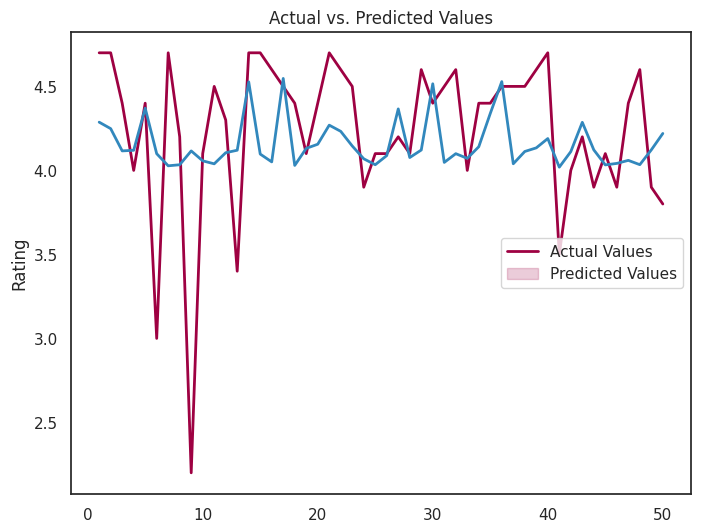

In [376]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.set_theme(style="white")
sns.lineplot(y=y_test_scaled.iloc[:50],x=range(1,51), ax=ax, linewidth=2, color='#9e0142')
sns.lineplot(y=y_pred[:50],x=range(1,51), ax=ax, linewidth=2, color='#3288bd')

plt.title('Actual vs. Predicted Values')
plt.legend(labels=['Actual Values', 'Predicted Values'], loc='center right')

plt.show()

## Model Score Comparison and Plots


In [377]:
matrix_comparison = np.transpose((np.vstack([model_type, rmse_scores])))
score_comparison_df = pd.DataFrame(matrix_comparison, columns = ['Models', 'RMSE'])
score_comparison_df['RMSE'] = score_comparison_df['RMSE'].astype(float)

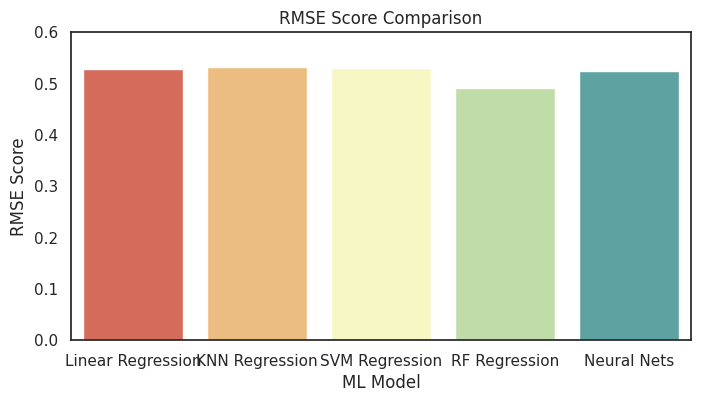

In [378]:
plt.figure(figsize=(8,4))

sns.set_theme(style="white")
sns.barplot(data=score_comparison_df, x='Models', y='RMSE', orient='v', palette='Spectral')

plt.title('RMSE Score Comparison')
plt.xlabel('ML Model')
plt.ylabel('RMSE Score')
plt.ylim(0, 0.6)
plt.show()

In [379]:
score_comparison_df

,Models,RMSE
0,Linear Regression,0.528097
1,KNN Regression,0.532571
2,SVM Regression,0.531026
3,RF Regression,0.490668
4,Neural Nets,0.524352


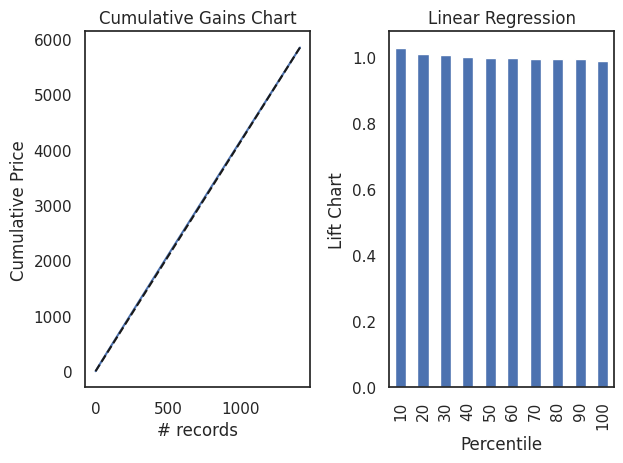

Above plots for Linear Regression
 


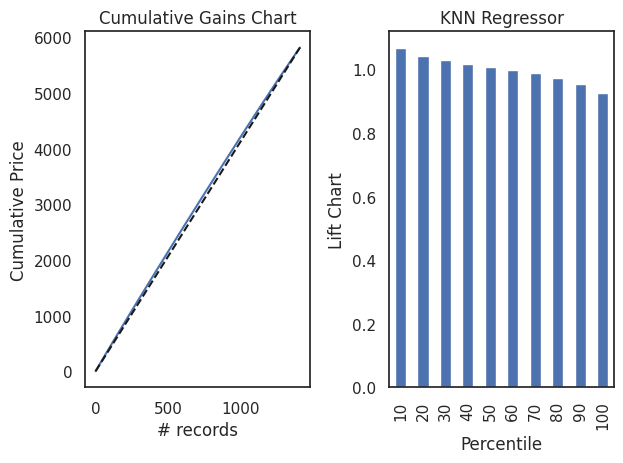

Above plots for KNN Regressor
 


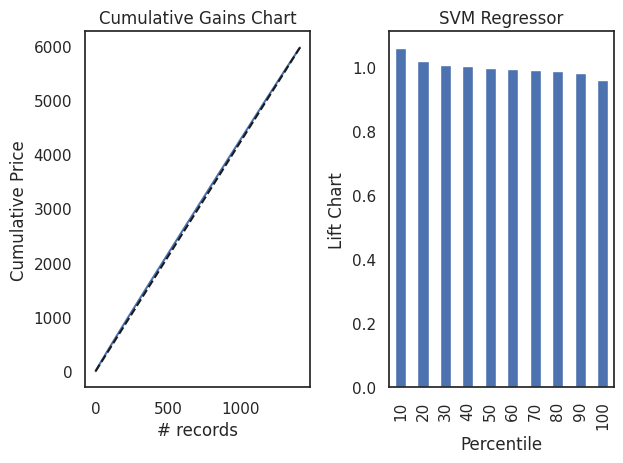

Above plots for SVM Regressor
 


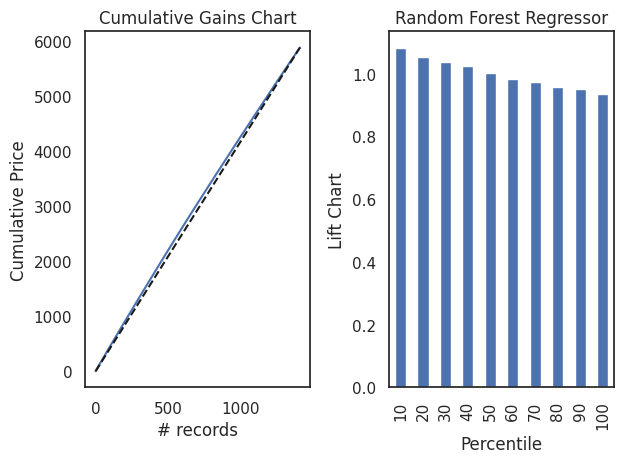

Above plots for Random Forest Regressor
 


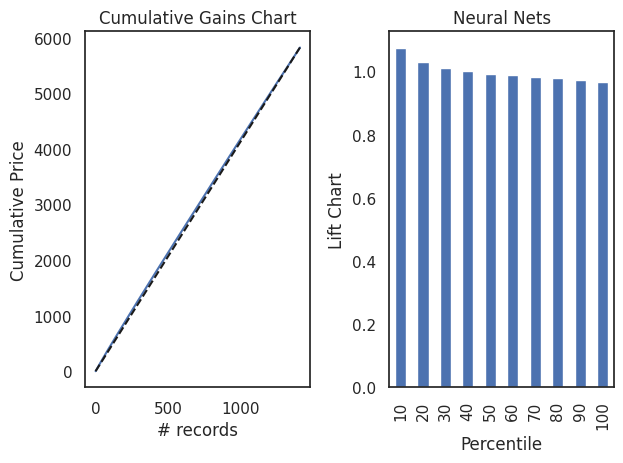

Above plots for Neural Nets
 


In [380]:
# Find lift for all models:

lift_calc(results_lr, 'Linear Regression')
lift_calc(results_knn, 'KNN Regressor')
lift_calc(results_svm, 'SVM Regressor')
lift_calc(results_rf, 'Random Forest Regressor')
lift_calc(results_nn, 'Neural Nets')

 This below code block is to find the best parameters to fine tune the neural net model. This takes about 1 hour to run so we have already run this and found the best parameters. We have used these parameters for our model implementation above.

In [381]:

def mlp_model(X, Y):

  estimator = MLPRegressor()


  param_grid = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,1)],
            'activation': ['relu','tanh','logistic'],
            'alpha': [0.0001, 0.05],
            'learning_rate': ['constant','adaptive'],
            'solver': ['adam']}

  gsc = GridSearchCV(
      estimator,
      param_grid,
      cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

  grid_result = gsc.fit(X, Y)


  best_params = grid_result.best_params_

  best_mlp = MLPRegressor(hidden_layer_sizes = best_params["hidden_layer_sizes"], 
                          activation =best_params["activation"],
                          solver=best_params["solver"],
                          max_iter= 5000, n_iter_no_change = 200
                )

  scoring = {
            'abs_error': 'neg_mean_absolute_error',
            'squared_error': 'neg_mean_squared_error',
            'r2':'r2'}

  scores = cross_validate(best_mlp, X, Y, cv=10, scoring=scoring, return_train_score=True, return_estimator = True)
  return scores

In [382]:
#mlp_model(X_train_scaled, y_train_scaled)

{'fit_time': array([411.26328874, 123.74106073, 438.32418489, 405.84533691,
        275.0663588 , 158.30846548, 572.39734459, 480.16785073,
        468.33537054,  61.70028353]),
 'score_time': array([0.00992584, 0.00919032, 0.00830102, 0.00863552, 0.00817561,
        0.00813413, 0.00873327, 0.00825191, 0.01681638, 0.01198435]),
 'estimator': [MLPRegressor(activation='tanh', hidden_layer_sizes=(50, 100, 50), max_iter=5000,
               n_iter_no_change=200),
  MLPRegressor(activation='tanh', hidden_layer_sizes=(50, 100, 50), max_iter=5000,
               n_iter_no_change=200),
  MLPRegressor(activation='tanh', hidden_layer_sizes=(50, 100, 50), max_iter=5000,
               n_iter_no_change=200),
  MLPRegressor(activation='tanh', hidden_layer_sizes=(50, 100, 50), max_iter=5000,
               n_iter_no_change=200),
  MLPRegressor(activation='tanh', hidden_layer_sizes=(50, 100, 50), max_iter=5000,
               n_iter_no_change=200),
  MLPRegressor(activation='tanh', hidden_layer_sizes=(50, 100, 50), max_iter=5000,
               n_iter_no_change=200),
  MLPRegressor(activation='tanh', hidden_layer_sizes=(50, 100, 50), max_iter=5000,
               n_iter_no_change=200),
  MLPRegressor(activation='tanh', hidden_layer_sizes=(50, 100, 50), max_iter=5000,
               n_iter_no_change=200),
  MLPRegressor(activation='tanh', hidden_layer_sizes=(50, 100, 50), max_iter=5000,
               n_iter_no_change=200),
  MLPRegressor(activation='tanh', hidden_layer_sizes=(50, 100, 50), max_iter=5000,
               n_iter_no_change=200)],
 'test_abs_error': array([-0.47545556, -0.40096056, -0.40552101, -0.44601406, -0.34748923,
        -0.34336958, -0.42383779, -0.40299574, -0.43225469, -0.35738158]),
 'train_abs_error': array([-0.35680631, -0.3869497 , -0.36931402, -0.35326129, -0.37613862,
        -0.39013539, -0.34732678, -0.36254774, -0.35257035, -0.38566856]),
 'test_squared_error': array([-0.48110357, -0.39811749, -0.28387537, -0.40236717, -0.25308927,
        -0.2253353 , -0.34790932, -0.3034049 , -0.35535296, -0.25369199]),
 'train_squared_error': array([-0.2639344 , -0.30149675, -0.28471447, -0.27173164, -0.2938546 ,
        -0.30563323, -0.26969021, -0.28110505, -0.27154952, -0.31008341]),
 'test_r2': array([-0.0283697 , -0.4457056 , -0.08701102,  0.00961813,  0.02238461,
         0.07947537,  0.00441417,  0.01938118, -0.01348685,  0.06996593]),
 'train_r2': array([0.13136953, 0.07306783, 0.12891586, 0.12536734, 0.1015394 ,
        0.06998058, 0.14932869, 0.12543645, 0.14234771, 0.04668685])}